In [4]:
import quandl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

In [5]:
quandl.ApiConfig.api_key = 'zZzhwTNJ1Z8SxApaAd8K'

df = quandl.get("WIKI/TSLA")
df = df[['Adj. Close']]
df

,Adj. Close
Date,
2010-06-29,23.89
2010-06-30,23.83
2010-07-01,21.96
2010-07-02,19.20
2010-07-06,16.11
...,...
2018-03-21,316.53
2018-03-22,309.10
2018-03-23,301.54


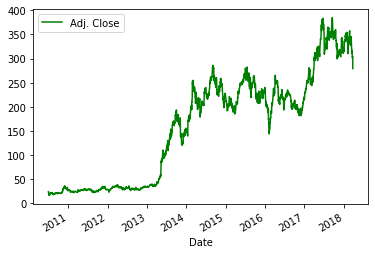

In [6]:
df['Adj. Close'].plot(color='g')
plt.legend(loc='upper left')
plt.show()

In [7]:
forecast = 30
df['Prediction'] = df[['Adj. Close']].shift(-forecast)

X = np.array(df.drop(['Prediction'], 1))
X = preprocessing.scale(X)

X_forecast = X[-forecast:]
X = X[:-forecast]

y = np.array(df['Prediction'])
y = y[:-forecast]

C:\Users\mhars\AppData\Local\Temp\ipykernel_12804\183587925.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['Prediction'], 1))


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = LinearRegression()
clf.fit(X_train, y_train)

confidence = clf.score(X_test, y_test)

forecast_predicted = clf.predict(X_forecast)
print(forecast_predicted)

[325.22872717 323.90487691 335.43218052 336.82957803 336.12352455
 334.6819987  347.30270458 353.06880796 358.33479013 352.02934034
 344.25294581 332.35790601 336.46674499 334.7310302  329.68078659
 333.70136888 330.56335343 328.67073787 346.65548889 343.05657743
 328.14119776 327.13114904 322.96347227 315.32436592 312.37267014
 318.23683651 310.95075689 303.5371954  306.12605815 281.61031248]


(17282.0, 17789.9)

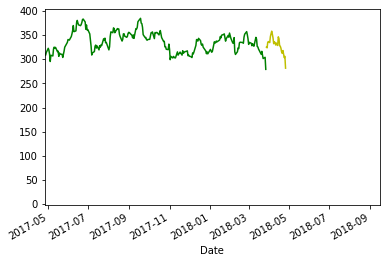

In [9]:
dates = pd.date_range(start="2023-03-28", end="2023-04-26")
plt.plot(dates, forecast_predicted, color='y')
df['Adj. Close'].plot(color='g')
plt.xlim(xmin=datetime.date(2017,4,26))